In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from get_pipe_data import get_pipe_data
from point_cloud import FaceCloud
import pickle

True


W0000 00:00:1699889120.937609       1 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options, output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True, num_faces=1, )
detector = vision.FaceLandmarker.create_from_options(options)

W0000 00:00:1699889120.985009       1 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


In [3]:
im_path = "Sample_Images/Anger_01.png"
# get image as RGB array
img_array = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
# get image as mediapipe image
img_mp = mp.Image(data=img_array, image_format=mp.ImageFormat.SRGB)
face_landmarks, blend_data, _ = get_pipe_data(detector, img_mp)

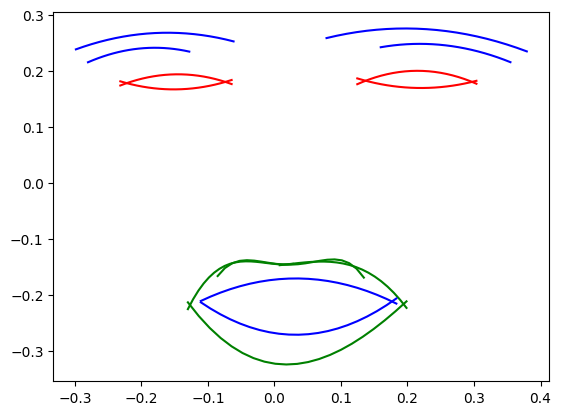

array([ 6.27674143e+01,  2.52785511e+00, -1.15577028e-01, -1.45077672e-01,
       -1.82543285e+01,  1.12761025e+00,  1.16490841e-01, -1.48263988e-01,
       -4.90052503e+02,  4.49206682e+01,  2.58434888e+00, -1.54412473e-01,
       -1.44602262e-01, -4.71274369e+00,  4.58055731e+00, -1.63772225e-01,
       -3.23018808e-01, -1.96670826e+00,  1.26733412e-01, -1.73016395e-01,
        2.83627498e+00, -1.82332198e-01, -2.68533560e-01, -2.92742368e+00,
        1.25821660e+00,  6.44122438e-02,  1.85709634e+00, -8.19136824e-01,
        2.59260366e-01, -2.66605553e+00, -7.74487432e-01,  1.37113527e-01,
        2.22145079e+00,  6.72248503e-01,  2.17305494e-01, -1.22401731e+00,
        4.81264465e-01,  2.27854011e-01, -1.75737918e+00,  7.67581352e-01,
        1.63896530e-01, -1.56574864e+00, -5.03964008e-01,  2.27007310e-01,
       -2.56003394e+00, -9.20994793e-01,  1.57891061e-01,  2.51920520e-01,
        2.09745116e-01])

In [4]:
face = FaceCloud(face_landmarks)
face.preprocess()
face.create_shape_feature(demo=True)


In [5]:
with open('Reference.pickle', 'wb') as file:
    pickle.dump(face, file, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
im_path = "Sample_Images/Sad_003.png"
# get image as RGB array
img_array = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
# get image as mediapipe image
img_mp = mp.Image(data=img_array, image_format=mp.ImageFormat.SRGB)
face_landmarks_2, blend_data, _ = get_pipe_data(detector, img_mp)

[56.03546458 20.         24.35075982] [ 1. -1.  1.]
(243,)


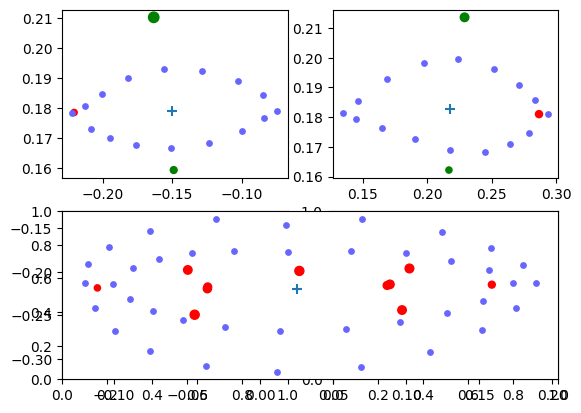

In [7]:
face_2 = FaceCloud(face_landmarks_2)

face_2.preprocess()
delta_feature = face_2.create_delta_feature(face, demo=True)
print(delta_feature.shape)

In [8]:
AUs = face_2.detect_action_units()
print(AUs.shape)

False


AttributeError: 'NoneType' object has no attribute 'shape'